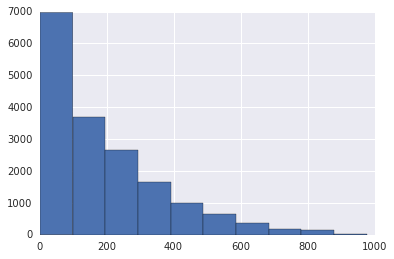

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
bike_rentals = pd.read_csv('bike_rental_hour.csv')

bike_rentals['cnt'].hist()

In [83]:
corr = bike_rentals.corr()

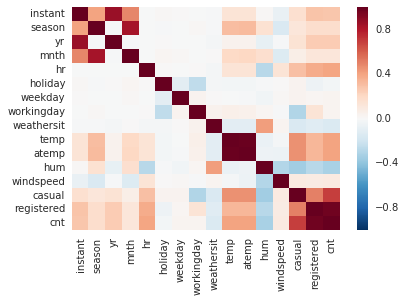

In [84]:
sns.heatmap(corr)

In [85]:
corr['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [86]:
#group hours
def assign_label(hr):
    if hr >=6 and hr <12:
        return 1
    elif hr >= 12 and hr < 18:
        return 2
    elif hr >= 18:
        return 3
    elif hr < 6:
        return 4
        
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [87]:
bike_rentals['time_label'].value_counts()

2    4375
3    4368
1    4360
4    4276
Name: time_label, dtype: int64

In [88]:
# create training (80%) and test (20%) sets
train = bike_rentals.sample(int(bike_rentals.shape[0]*.8), 
                            random_state = 1)
test = bike_rentals[~bike_rentals.index.isin(train.index)]



In [89]:
train

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
15652,15653,2012-10-19,4,1,10,9,0,5,1,2,0.54,0.5152,0.94,0.1045,26,363,389,1
3085,3086,2011-05-13,2,0,5,11,0,5,1,2,0.52,0.5000,0.83,0.1642,56,90,146,1
1684,1685,2011-03-15,1,0,3,19,0,2,1,2,0.34,0.3182,0.71,0.2836,14,138,152,3
10555,10556,2012-03-20,1,1,3,22,0,2,1,1,0.54,0.5152,0.77,0.0000,32,156,188,3
14622,14623,2012-09-06,3,1,9,11,0,4,1,3,0.70,0.6667,0.84,0.1642,10,52,62,1
1915,1916,2011-03-25,2,0,3,14,0,5,1,1,0.36,0.3333,0.32,0.3284,30,103,133,2
13947,13948,2012-08-09,3,1,8,8,0,4,1,1,0.72,0.6970,0.74,0.1045,28,670,698,1
227,228,2011-01-10,1,0,1,18,0,1,1,1,0.20,0.1970,0.40,0.2239,1,154,155,3
15950,15951,2012-11-02,4,1,11,7,0,5,1,2,0.30,0.3030,0.70,0.1343,8,349,357,1
3471,3472,2011-05-29,2,0,5,13,0,0,0,1,0.72,0.6818,0.70,0.2836,237,181,418,2


# Prediction

### Linear Regression

In [102]:
columns = ['season', 'yr', 'mnth', 'holiday',
           'weekday', 'workingday', 'weathersit', 'atemp', 
           'hum', 'time_label']

In [104]:
lr = LinearRegression(normalize=False)
lr.fit(train[columns], train['cnt'])
predictions = lr.predict(test[columns])
train_predictions = lr.predict(train[columns])
print('train mse', mean_squared_error(train_predictions, train['cnt']))
print('test mse', mean_squared_error(predictions, test['cnt']))

train mse 19453.2694975
test mse 18818.7561317


No evidence of overfitting (train mse !>> test mse), but error seems high

### Decision Tree Regressor

In [106]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(train[columns], train['cnt'])
predictions2 = dtr.predict(test[columns])
train_predictions2 = dtr.predict(train[columns])
print('train mse', mean_squared_error(train_predictions2, train['cnt']))
print('test mse', mean_squared_error(predictions2, test['cnt']))

train mse 1469.32585995
test mse 19778.409193


Some significant overfitting here (note order of magnitude difference)

In [144]:
#hyperparameter optimization:
dtr = DecisionTreeRegressor(min_samples_leaf=19, max_depth = 13)
dtr.fit(train[columns], train['cnt'])
predictions2 = dtr.predict(test[columns])
train_predictions2 = dtr.predict(train[columns])
print('train mse', mean_squared_error(train_predictions2, train['cnt']))
print('test mse', mean_squared_error(predictions2, test['cnt']))

train mse 11674.047519
test mse 12899.866727


increasing min_samples_leaf and max_depth decrease the overfitting and decrease the MSE on the test set.

In [146]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(train[columns], train['cnt'])
predictions3 = rf.predict(test[columns])
train_predictions3 = rf.predict(train[columns])
print('train mse', mean_squared_error(train_predictions3, train['cnt']))
print('test mse', mean_squared_error(predictions3, test['cnt']))

train mse 3351.11261852
test mse 13333.7150795


still quite a bit of overfitting here, but better than default decision tree

In [154]:
#hyperparameter optimization

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=19, max_depth = 13)
rf.fit(train[columns], train['cnt'])
predictions3 = rf.predict(test[columns])
train_predictions3 = rf.predict(train[columns])
print('train mse', mean_squared_error(train_predictions3, train['cnt']))
print('test mse', mean_squared_error(predictions3, test['cnt']))

train mse 10975.0560003
test mse 12246.2505517


Beyond 100, not much improvement to be gained by increasing n_estimators, not worth slow-down.
parameters that apply to both decision trees and forests seem to optimize at the same point, so perhaps makes sense to optimize with decision tree (faster to iterate) and then translate them to forest


## Predicting casual given registered users

In [156]:
columns = ['registered', 'season', 'yr', 'mnth', 'holiday',
           'weekday', 'workingday', 'weathersit', 'atemp', 
           'hum', 'time_label']#hyperparameter optimization

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=19, max_depth = 13)
rf.fit(train[columns], train['casual'])
predictions3 = rf.predict(test[columns])
train_predictions3 = rf.predict(train[columns])
print('train mse', mean_squared_error(train_predictions3, train['casual']))
print('test mse', mean_squared_error(predictions3, test['casual']))

train mse 272.308919289
test mse 348.848979159
